In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

In [3]:
gene = pd.read_csv("Ch10Ex11.csv", header=None)

(1000, 40)

In [5]:
# taken from
# https://stackoverflow.com/questions/26851553/sklearn-agglomerative-clustering-linkage-matrix

def get_distances(X,model,mode='l2'):
    distances = []
    weights = []
    children=model.children_
    dims = (X.shape[1],1)
    distCache = {}
    weightCache = {}
    for childs in children:
        c1 = X[childs[0]].reshape(dims)
        c2 = X[childs[1]].reshape(dims)
        c1Dist = 0
        c1W = 1
        c2Dist = 0
        c2W = 1
        if childs[0] in distCache.keys():
            c1Dist = distCache[childs[0]]
            c1W = weightCache[childs[0]]
        if childs[1] in distCache.keys():
            c2Dist = distCache[childs[1]]
            c2W = weightCache[childs[1]]
        d = np.linalg.norm(c1-c2)
        cc = ((c1W*c1)+(c2W*c2))/(c1W+c2W)

        X = np.vstack((X,cc.T))

        newChild_id = X.shape[0]-1

        # How to deal with a higher level cluster merge with lower distance:
        if mode=='l2':  # Increase the higher level cluster size suing an l2 norm
            added_dist = (c1Dist**2+c2Dist**2)**0.5 
            dNew = (d**2 + added_dist**2)**0.5
        elif mode == 'max':  # If the previrous clusters had higher distance, use that one
            dNew = max(d,c1Dist,c2Dist)
        elif mode == 'actual':  # Plot the actual distance.
            dNew = d


        wNew = (c1W + c2W)
        distCache[newChild_id] = dNew
        weightCache[newChild_id] = wNew

        distances.append(dNew)
        weights.append( wNew)
    return distances, weights

In [6]:
# Taken from
# https://stackoverflow.com/questions/32303217/how-to-use-pearson-correlation-as-distance-metric-in-scikit-learn-agglomerative

from scipy.stats import pearsonr
import numpy as np

def pearson_affinity(M):
   return 1 - np.array([[pearsonr(a,b)[0] for a in M] for b in M])

In [9]:
model = AgglomerativeClustering(n_clusters=2, affinity=pearson_affinity, linkage='average').fit(gene)

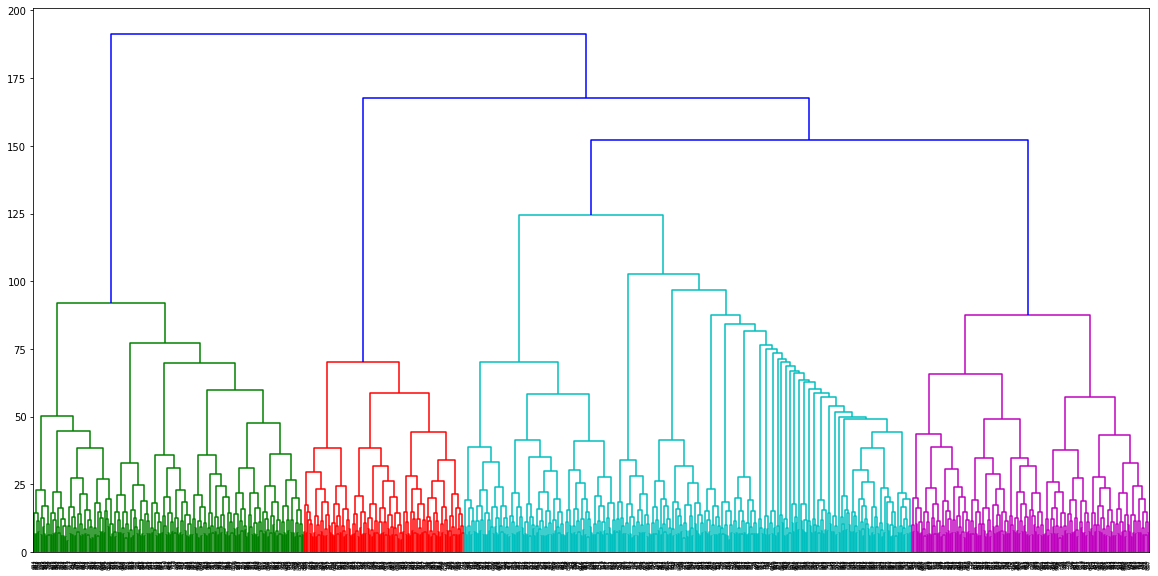

In [18]:
distance, weight = get_distances(gene.to_numpy() ,model)
linkage_matrix = np.column_stack([model.children_, distance, weight]).astype(float)
plt.figure(figsize=(20,10))
dendrogram(linkage_matrix)
plt.show()